# Data analisis dan visualisasi data teknikal finance menggunakan piton

### bagaiaman cara menggunakan python library seperti pandas, matplotlib dan seaborn untuk mendapatakan insights dari data harga volum stock harian dari pasar saham

# 1. Tentang Data nya

For this analysis, 2 years of historical data from around mid-Feb 2018 to Feb 2020 of the below stocks listed on National Stock Exchange(NSE)— https://www1.nseindia.com/global/content/about_us/about_us.htm were used.

- HDFC Ltd.
- Sun Pharmaceutical Industries Ltd.
- Tata Consultancy Services Ltd.
- Jindal Steel & Power Ltd.
- Jubilant FoodWorks Ltd.

The selected stocks are from different sectors and market cap. For the start, we’ll investigate the HDFC stock individually and then move on to the combined analysis. For this section, the csv file of historical data of HDFC stock has been downloaded from Yahoo finance https://in.finance.yahoo.com/.

# 2. Data Understanding and General Statistics

import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Read data from csv file and display first few rows

In [2]:
HDFC_df = pd.read_csv("Salinan HDFCBANK.NS.csv")
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


since out time-frame of analysis is large, we can relax on number of decimal places to consider.

In [3]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
3,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
4,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


better! lets determine the shape of dataset

In [4]:
HDFC_df.shape

(491, 7)

In [5]:
HDFC_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

kita buang yang null

In [6]:
HDFC_df.dropna(inplace=True, axis=0)

kita cek juga data type tiap column nya

In [7]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

ternyata untuk kolom date nya harus diubah ke datetime
kita pake pandas untuk merubah date ke datetime

In [8]:
HDFC_df["Date"] = pd.to_datetime(HDFC_df["Date"])
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
3,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
4,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


In [9]:
HDFC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

data date sudah berubah ke format datetime

In [10]:
type(HDFC_df.loc[0, "Date"])

pandas._libs.tslibs.timestamps.Timestamp

lalu kita mengambil data date dari terakhir hingga pertama

In [11]:
HDFC_df["Date"].max() - HDFC_df["Date"].min()

Timedelta('729 days 00:00:00')

kita ngambil data 90 hari terakhir dari awal data

In [12]:
HDFC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

ada beberapa error tadi, karna tutorial nya masih lama, jadi ada beberap perubahan di pandas version terbaru, sehingga seharusnya date tidak terikut, namun masih terikut di operasi describe

solusi nya = menggunakan slect_dtypes untuk filter tipe data yang diinginkan

In [13]:
HDFC_df.iloc[-90:].select_dtypes(include=["number"]).describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1255,1263,1243,1252,1252,5973670
std,24,22,25,24,24,1824496
min,1197,1197,1177,1186,1186,1836849
25%,1242,1248,1227,1239,1239,4651834
50%,1256,1262,1243,1253,1253,5792594
75%,1276,1281,1264,1272,1272,6685996
max,1305,1305,1288,1302,1302,11256610


## 3. General variation in the stock price

Sebelum kita melanjutkan ke penyelidikan lebih lanjut, kita akan mengatur kolom ‘Tanggal’ sebagai indeks dari dataframe. Hal ini memudahkan pembuatan plot.

In [14]:
HDFC_df.index = HDFC_df["Date"]

In [15]:
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


sekarang kita plot closing price dari stock dari periode 2 tahun untuk mendapatkan insight tentang general variation dalam harga stock tersebut

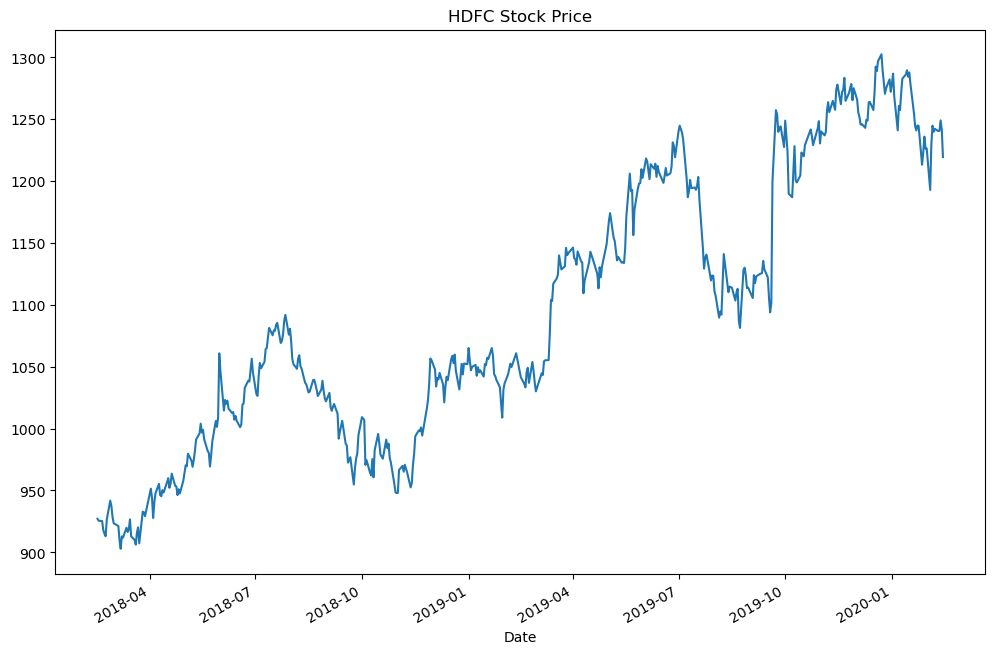

In [16]:
HDFC_df["Adj Close"].plot(
    figsize=(12, 8),
    title="HDFC Stock Price",
)
plt.show()

In the above plot, if you notice, there is a drastic decrease in the price of stock sometime around the month of September 2018. Apart from the “September effect”, the general decline in the stock price of HDFC can be attributed to the escalating tariff war between the US and China: https://www.vox.com/world/2018/7/6/17542482/china-trump-trade-war-tariffs that had a ripple effect on Indian financial markets.

## 4. Day-to-day percentage change(Daily returns)

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100. No mystery here!

Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built pct_change() function in python.

Great question!

```python
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change() * 1
```

### 🔍 Apa itu `pct_change()`?

`pct_change()` adalah fungsi di **pandas** untuk menghitung **persentase perubahan** antar baris dalam kolom numerik.

> 🔢 Artinya:
> **Seberapa besar perubahan (naik/turun) dari baris sebelumnya ke baris sekarang**, dalam bentuk **persentase**.

---

### 📘 Rumus `pct_change()`:

Untuk baris ke-*i*:

```text
(df[i] - df[i-1]) / df[i-1]
```

Misalnya:

| Hari | Adj Close |
| ---- | --------- |
| 1    | 100       |
| 2    | 110       |
| 3    | 90        |

Maka:

* Hari 2: `(110 - 100) / 100 = 0.10` → naik 10%
* Hari 3: `(90 - 110) / 110 = -0.1818` → turun \~18.18%

---

### 🤔 Kenapa dikali `* 1`?

Jawabannya: **tidak ngaruh apa-apa**.
Itu mungkin hanya placeholder atau keliru.

Kalau ingin jadi **persen (dalam %)**, seharusnya:

```python
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change() * 100
```

Agar hasilnya jadi:

| Hari | Adj Close | Day\_Perc\_Change |
| ---- | --------- | ----------------- |
| 1    | 100       | NaN               |
| 2    | 110       | 10.0              |
| 3    | 90        | -18.18            |

---

### 🧠 Catatan:

* Baris pertama hasilnya `NaN`, karena tidak ada data sebelumnya untuk dibandingkan.
* Gunakan `.fillna(0)` jika kamu mau isi awalnya jadi nol:

  ```python
  HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change().fillna(0) * 100
  ```

---


In [18]:
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0,NaN
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0,-0.311571


You’ll notice that the first value in the ‘Day_Perc_Change’ column is NaN. We’ll drop this row.

In [19]:
# menghapus bari pertama yang hasil pct_change = NaN
HDFC_df.dropna(axis = 0, inplace = True)

In [20]:
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-16,2018-02-16,941.95,947.42,937.83,939.3,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.1,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.6,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.7,915.07,1376536.0,-0.311571
2018-02-22,2018-02-22,925.00,930.00,920.78,926.6,913.00,6626798.0,-0.226212


Representing daily returns in form of a plot —

<Axes: xlabel='Date'>

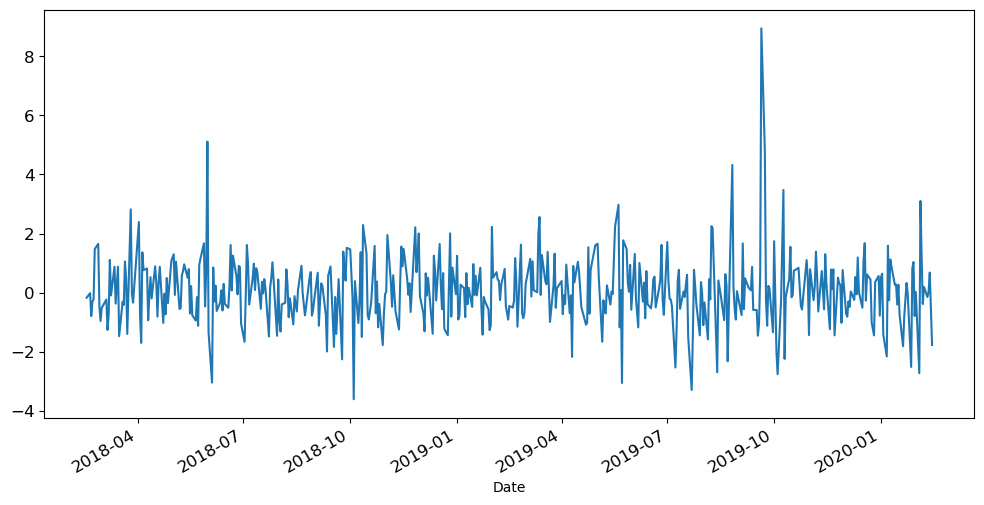

In [21]:
HDFC_df["Day_Perc_Change"].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 6% mark on both the sides.

Likewise you can find similar news articles for the days when there was drastic rise/fall in the price of the stock.

Plotting daily returns distribution histogram —

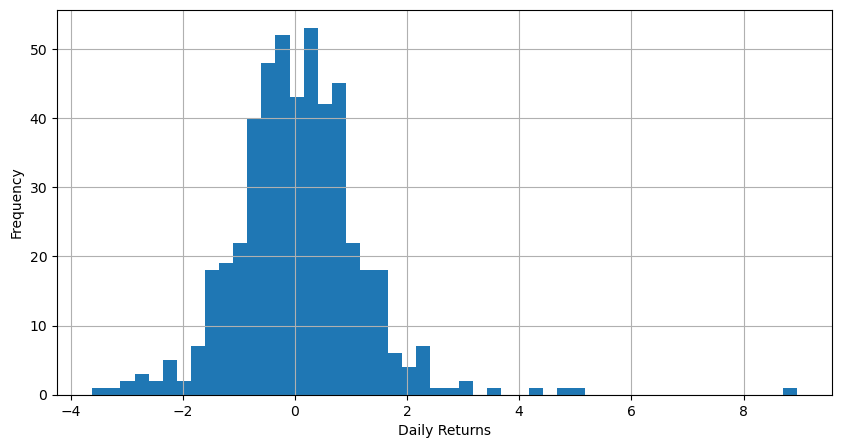

count    489.000000
mean       0.062724
std        1.162384
min       -3.614446
25%       -0.596775
50%        0.020391
75%        0.693165
max        8.950547
Name: Day_Perc_Change, dtype: float64

In [22]:
HDFC_df["Day_Perc_Change"].hist(
    bins= 50,
    figsize=(10, 5)
)

plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

HDFC_df.Day_Perc_Change.describe()

The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.072 and for most of the days the daily return was less than 1% implying that the HDFC stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 6.46% and was 6.56% in negative direction. Clearly, we didn’t had any instances of ‘bull run’ or ‘bear drop’!

# 5. Trend Analysis

Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

In [23]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"

# HDFC_df["Trend"]= np.zeros(HDFC_df["Day_Perc_Change"].count())
HDFC_df["Trend"]= HDFC_df["Day_Perc_Change"].apply(lambda x:trend(x))
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-02-16,2018-02-16,941.95,947.42,937.83,939.3,925.51,1791760.0,-0.175809,Slight or No change
2018-02-19,2018-02-19,941.30,943.80,929.53,939.1,925.32,1827276.0,-0.020529,Slight or No change
2018-02-20,2018-02-20,942.38,942.92,929.40,931.6,917.93,2042034.0,-0.798643,Slight Negative
2018-02-21,2018-02-21,933.97,934.28,926.10,928.7,915.07,1376536.0,-0.311571,Slight or No change
2018-02-22,2018-02-22,925.00,930.00,920.78,926.6,913.00,6626798.0,-0.226212,Slight or No change


In [24]:
HDFC_df["Trend"].value_counts()

Trend
Slight or No change    192
Slight Negative         76
Slight Positive         75
Positive                71
Negative                65
Among top gainers        5
Among top losers         4
Bull run                 1
Name: count, dtype: int64

We wish to see how the stock was trending in past 2 years. This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.

For this, we’ll use the groupby() function with the trend column to aggregate all days with the same trend into a single group before plotting the pie chart.

Visualizing Trend Frequency with Pie-Chart —

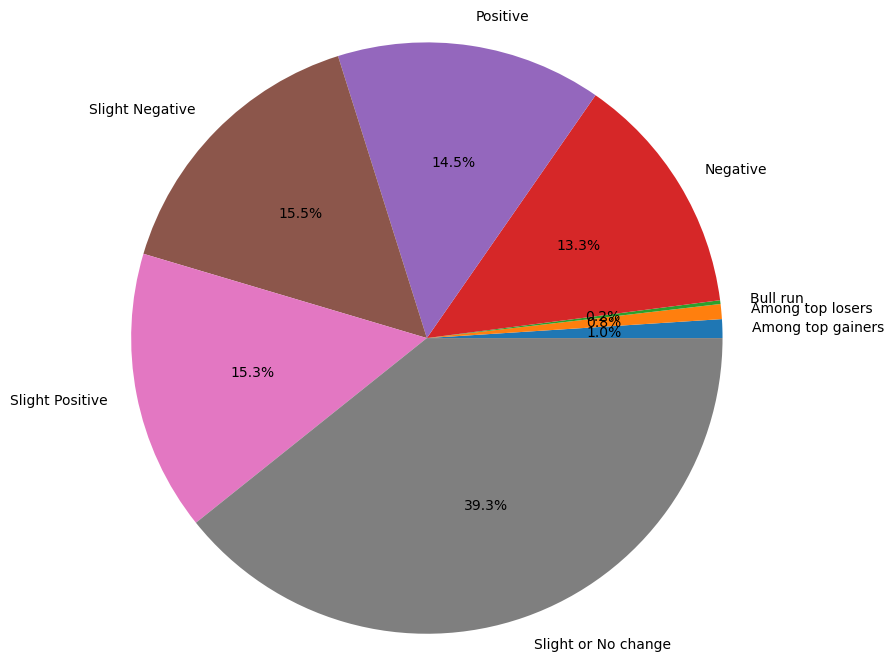

In [25]:
HDFC_pie_data = HDFC_df.groupby('Trend')
pie_label = sorted([i for i in HDFC_df.loc[:, 'Trend'].unique()])
plt.pie(HDFC_pie_data['Trend'].count(), labels = pie_label,
        autopct = '%1.1f%%', radius = 2)

plt.show()

For the period under consideration from mid-Feb 2018 to Feb 2020, the HDFC stock was among the top gainers for about 1.8% of the time, and among the top losers for 1.6 %. For about 12.4% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 39.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

# 6. Daily return and volume

<Axes: xlabel='Date'>

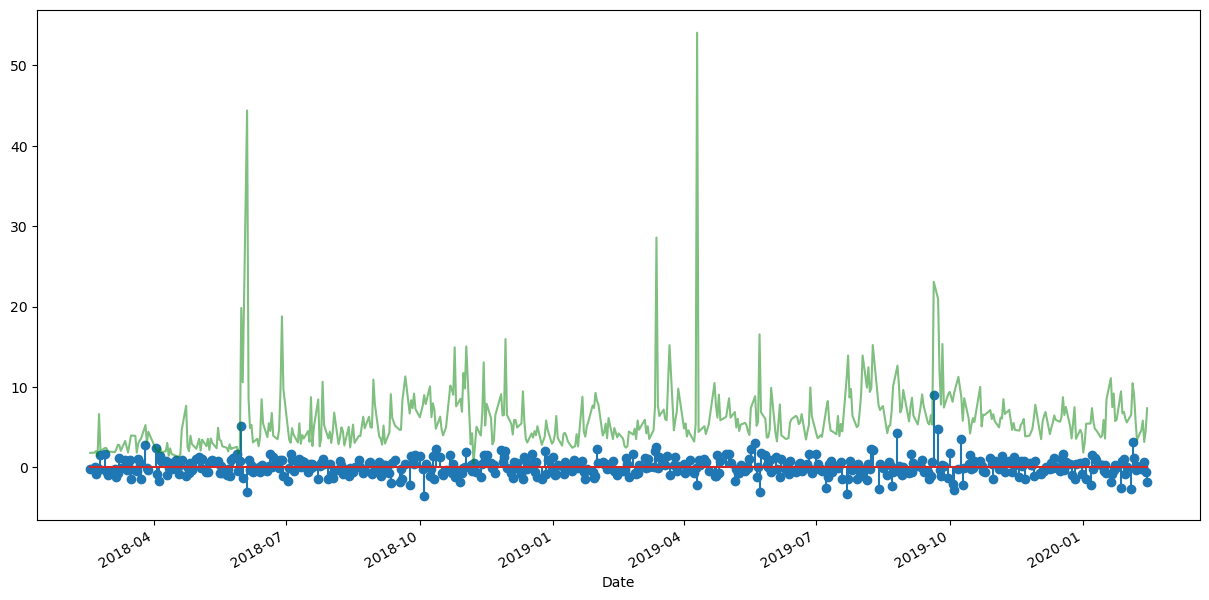

In [26]:
plt.stem(HDFC_df["Date"], HDFC_df["Day_Perc_Change"])
(HDFC_df["Volume"]/1000000).plot(figsize = (15, 7.5),
                                 color = "green",
                                 alpha = 0.5)

(* Daily volume of trade has been reduced in scale to match with the daily return scale)

By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company.

## 7. Correlation Analysis Of Stocks with Pair plot and Joint plots

### “Never put all your eggs in a single basket”

Whenever we go for the diversification: https://www.fidelity.com/learning-center/investment-products/mutual-funds/diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson’s correlation coefficient (also called Pearson’s R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you’re at the risk of losing all your investment!

I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.

In previous section we’ve used the pre-downloaded csv file for analysis. In this section, we’ll take the help of Pandas web data reader: https://pandas-datareader.readthedocs.io/en/latest/ package to extract the prices of stocks.

In [39]:
# load stock market data
JINDALSTEL_df = pd.read_csv("JINDALSTEL.NS.csv", parse_dates=["Date"], index_col="Date")
JUBLFOOD_df = pd.read_csv("JUBLFOOD.NS.csv", parse_dates=["Date"], index_col="Date")
SUNPHARMA_df = pd.read_csv("SUNPHARMA.NS.csv", parse_dates=["Date"], index_col="Date")
TCS_df = pd.read_csv("TCS.NS.csv", parse_dates=["Date"], index_col="Date")
NSEI_df = pd.read_csv("^NSEI.csv", parse_dates=["Date"], index_col="Date")


# merge Adj. close values
combined_df = pd.concat([HDFC_df["Adj Close"], JINDALSTEL_df["Adj Close"], JUBLFOOD_df["Adj Close"], SUNPHARMA_df["Adj Close"], TCS_df["Adj Close"], NSEI_df["Adj Close"]], axis=1)
combined_df.columns = ["HDFC.NS", "JINDALSTEL.NS", "JUBLFOOD.NS", "SUNPHARMA.NS", "TCS.NS", "^NSEI"]




In [40]:
# drop null values
combined_df.dropna(inplace = True, axis = 0)

# display first few rows
combined_df.head()

,HDFC.NS,JINDALSTEL.NS,JUBLFOOD.NS,SUNPHARMA.NS,TCS.NS,^NSEI
Date,,,,,,
2018-02-16,925.51,251.500000,966.697205,564.658447,1381.952393,10452.299805
2018-02-19,925.32,250.000000,987.599854,551.063477,1377.495239,10378.400391
2018-02-20,917.93,252.000000,989.259155,549.198486,1387.465088,10360.400391
2018-02-21,915.07,247.300003,985.841492,516.069885,1433.422729,10397.450195
2018-02-22,913.00,250.250000,978.213562,531.480835,1437.144653,10382.700195
